### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [1]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "Av6tAOfnOjxORkBF0VOy88nOxLsXgcRN"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=Av6tAOfnOjxORkBF0VOy88nOxLsXgcRN&offset=0&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [2]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [3]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606173046',
  'comments': [{'commentID': 107564420,
    'status': 'approved',
    'commentSequence': 107564420,
    'userID': 72595694,
    'userDisplayName': 'JM',
    'userLocation': 'New York',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
    'createDate': '1591956558',
    'updateDate': '1593964903',
    'approveDate': '1591956558',
    'recommendations': 674,
    'replyCount': 13,
    'replies': [{'commentID': 107566999,
      'status

In [4]:
# isolate just the comments dictionary
com = data['results']
comm = com['comments']
comm

[{'commentID': 107564420,
  'status': 'approved',
  'commentSequence': 107564420,
  'userID': 72595694,
  'userDisplayName': 'JM',
  'userLocation': 'New York',
  'userTitle': 'NULL',
  'userURL': 'NULL',
  'picURL': None,
  'commentTitle': '<br\\//>',
  'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
  'createDate': '1591956558',
  'updateDate': '1593964903',
  'approveDate': '1591956558',
  'recommendations': 674,
  'replyCount': 13,
  'replies': [{'commentID': 107566999,
    'status': 'approved',
    'commentSequence': 107566999,
    'userID': 34609658,
    'userDisplayName': 'Kristina',
    'userLocation': 'DC',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': "@JM \n\nD

In [68]:
# look at just one of the comments
for comment_id in comm[8:9]:
    comment_body = comment_id['commentBody']
    print (comment_body)

#check what type is comment_body
#print(type(comment_body))

Mr. Bouie is wrong about at least one thing - it's actually not unclear at all how Americans feel about this.  The protesters aren't doing themselves any favors in the eyes of the general public by taking it upon themselves to deface and destroy monuments, some of which people hold dear.  This is, in my opinion, a classic example of the silent majority gritting its teeth in the moment, lest they be "caught" and called out "in social justice style" defending what the protesters have universally deemed indefensible.  And so the silent majority will wait and wait and then using their votes, they will make it clear that this type of activism - and the politicians who cow to it - is unacceptable.  

It may be that these monuments do deserve to be taken down, or that they need to be publicly acknowledged as controversial in some formal way.  But that's a decision that should be made by the local citizens, not a small group of Protesters who think they own this moment.


In [69]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this


import string

lowerBody = comment_body.lower()
table = str.maketrans(dict.fromkeys(string.punctuation)) 
commentBody_noPun = lowerBody.translate(table)  

print(commentBody_noPun)

mr bouie is wrong about at least one thing  its actually not unclear at all how americans feel about this  the protesters arent doing themselves any favors in the eyes of the general public by taking it upon themselves to deface and destroy monuments some of which people hold dear  this is in my opinion a classic example of the silent majority gritting its teeth in the moment lest they be caught and called out in social justice style defending what the protesters have universally deemed indefensible  and so the silent majority will wait and wait and then using their votes they will make it clear that this type of activism  and the politicians who cow to it  is unacceptable  

it may be that these monuments do deserve to be taken down or that they need to be publicly acknowledged as controversial in some formal way  but thats a decision that should be made by the local citizens not a small group of protesters who think they own this moment


In [77]:
# split text into list
splitText = commentBody_noPun.split()
#print (splitText)
# create a dictionary of word frequencies!

di = dict()
for w in splitText:
    #counter
    if w in di:
        di[w] = di[w]+ 1
    else:
        di[w] = 1
    print(w,di[w])
    
print(di)

# go through each word in text_data
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    # if the word IS in the dictionary, add 1 to the value

mr 1
bouie 1
is 1
wrong 1
about 1
at 1
least 1
one 1
thing 1
its 1
actually 1
not 1
unclear 1
at 2
all 1
how 1
americans 1
feel 1
about 2
this 1
the 1
protesters 1
arent 1
doing 1
themselves 1
any 1
favors 1
in 1
the 2
eyes 1
of 1
the 3
general 1
public 1
by 1
taking 1
it 1
upon 1
themselves 2
to 1
deface 1
and 1
destroy 1
monuments 1
some 1
of 2
which 1
people 1
hold 1
dear 1
this 2
is 2
in 2
my 1
opinion 1
a 1
classic 1
example 1
of 3
the 4
silent 1
majority 1
gritting 1
its 2
teeth 1
in 3
the 5
moment 1
lest 1
they 1
be 1
caught 1
and 2
called 1
out 1
in 4
social 1
justice 1
style 1
defending 1
what 1
the 6
protesters 2
have 1
universally 1
deemed 1
indefensible 1
and 3
so 1
the 7
silent 2
majority 2
will 1
wait 1
and 4
wait 2
and 5
then 1
using 1
their 1
votes 1
they 2
will 2
make 1
it 2
clear 1
that 1
this 3
type 1
of 4
activism 1
and 6
the 8
politicians 1
who 1
cow 1
to 2
it 3
is 3
unacceptable 1
it 4
may 1
be 2
that 2
these 1
monuments 2
do 1
deserve 1
to 3
be 3
taken 1
down 1
o

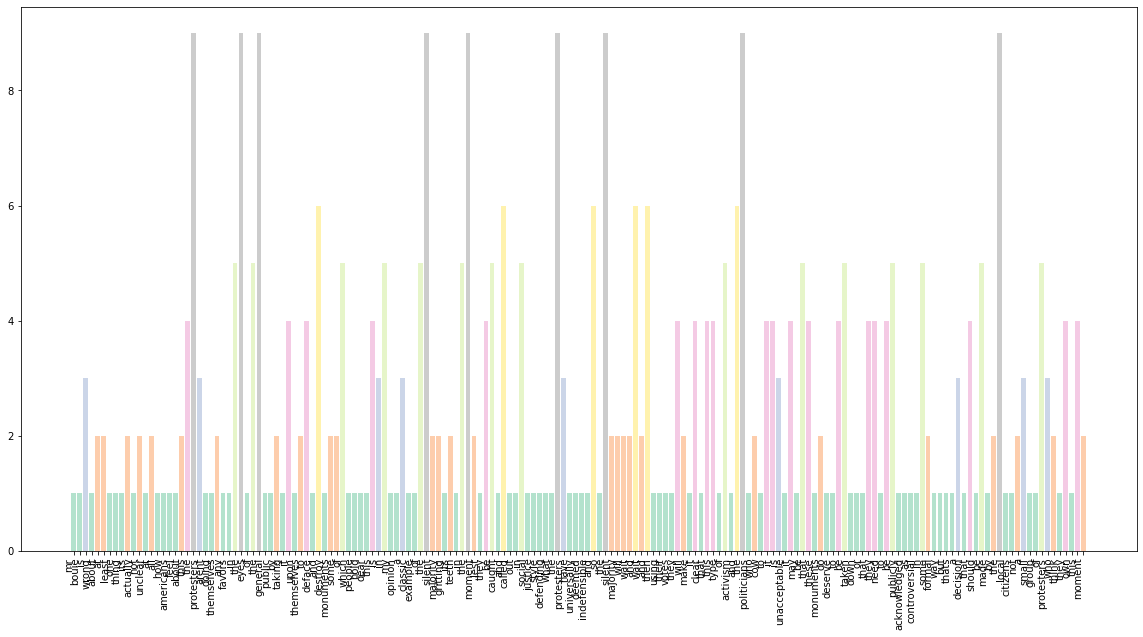

In [78]:
# try and plot out a chart of the dictionary we just created!
import matplotlib.pyplot as plt
import numpy as np

total_num = []
dept_names = []
for w in splitText:
    total_num.append(di[w])
    dept_names.append(w)

y = np.array(total_num)    
my_cmap = plt.get_cmap("Pastel2")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(20,10))
plt.bar(range(len(splitText)), total_num, color=my_cmap(rescale(y)), align="center")
plt.xticks(range(len(splitText)), dept_names, rotation=90, ha="right", fontsize=10)
plt.show()